# Проект: Исследовательский анализ стартапов
- Автор: Сумароков Сергей
- Дата: 25.02.2025

## Введение

Финансовая компания ищет выход на инвестиционный рынок для покупки, развития и последующей перепродажи стартапов. В условиях высокой конкуренции ей требуются глубокие аналитические исследования данных о стартапах для выявления прибыльных закономерностей. Необходимость в аутсорсинговых аналитиках обусловлена недостатком внутреннего опыта и неполнотой данных.

### Цели  и задачи проекта:

1. Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу 
2. Проверить достоверность информации о сотрудниках и их образовании.
3. Исследовать аномалии, такие как покупки за 0 или 1 доллар, и выяснить причины их появления.
4. Оценить влияние факторов (категория стартапов, количество раундов финансирования) на цену перед покупкой.
5. Разработать методику визуализации численных показателей и трендов на рынке.
6. Выявить ключевые показатели, увеличивающие вероятность успешной сделки.

### Содержимое проекта:
1. Загрузка данных и знакомство с ними.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ данных объединенных таблиц.
4. Итоговые выводы.

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Для анализа данных представлены следующие датасеты:
* acquisition.csv - информация о покупках одними компаниями других компаний.
* company_and_rounds.csv - информация о компаниях и раундах финансирования.
* degrees.csv - информация о типе образования сотрудника.
* education.csv - информация об образовании сотрудника
* fund.csv - информация о фондах.
* investment.csv - информация о раундах инвестирования.
* people.csv - информация о сотрудниках.

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### Вывод общей информации, исправление названия столбцов

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install phik==0.11.1

Загрузим данные по проекту. Чтобы не прописывать каждый раз метод read_csv создадим функцию `read_csv(dataset)`, которая будет возвращать объект DataFrame:

In [3]:
# Функция read_csv принимает параметр dataset - файл .csv 
# и возвращает объект DataFrame

def read_csv(df):
    return pd.read_csv('datasets/' + df)

Прочитаем все библиотеки и запишем в переменные:

In [4]:
acquisition = read_csv('acquisition.csv')
company_and_rounds = read_csv('company_and_rounds.csv')
degrees = read_csv('degrees.csv')
education = read_csv('education.csv')
fund = read_csv('fund.csv')
investment = read_csv('investment.csv')
people = read_csv('people.csv')

Занесем все переменные в список для дальнейшего использования в циклах `for`:

In [5]:
df_list = [acquisition,
           company_and_rounds,
           education,
           people,
           degrees,
           fund,
           investment]

Проверим названия столбцов всех датафреймов:

In [6]:
# Используем цикл for для вывода информации обо всех столбцах датафреймов
for df in df_list:
    print()
    print(df.columns)


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

Index(['id

В датафрейме `company_and_rounds` находятся два одинаковых столбца `company ID` и `company id`, скорее всего этот датафрейм состоит из двух датасетов, которые соеденили по `company_id`. Чтобы в дальнейшем не было ошибок, удалим второй столбец:

In [7]:
company_and_rounds.drop('company  id', axis=1, inplace=True)

Названия всех столбцов стоит привести к стилю написания snake_case, а также привести их к ниженму регистру. Напишем функцию `snake_case`, которая будет приводить названия столбцов датафрема к корректному виду:

In [8]:
# Функция snake_case принимает столбец датафрейма и заменяет в его названии
# пробелы на "_", а также приводит название к нижнему регистру

def snake_case(column):
    return column.lower().replace(' ', '_')

In [9]:
# Цикл перебирает все датафреймы
for df in df_list:
    
    # Цикл перебирает названия всех столбцов
    # и приводит их к корректному формату с помощью
    # функции snake_case
    df.columns = [snake_case(col) for col in df.columns]
        
    print()
    print(df.columns)


Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Index(['company__id', 'name', 'category__code', 'status', 'founded__at',
       'closed__at', 'domain', 'network__username', 'country__code',
       'investment__rounds', 'funding__rounds', 'funding__total', 'milestones',
       'funding__round__id', 'funded__at', 'funding__round__type',
       'raised__amount', 'pre__money__valuation', 'participants',
       'is__first__round', 'is__last__round'],
      dtype='object')

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

Index(['id', 'funding_rou

Функция сработала, но похоже во втором датафрейме было два пробела. Применим функцию `.str.replace()` чтобы заменить два нижних подчеркивания на одно:

In [10]:
company_and_rounds.columns = company_and_rounds.columns.str.replace('__', '_')

Проверим столбцы в `company_and_rounds`:

In [11]:
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')

Названия всех столбцов корректны. 


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Выведем основную информацию о всех датасетах с помощью `info()` и первые 5 строк с помошью `head()`:

In [12]:
# Счетчик для разделения датафреймов по порядковому номеру
n = 1

# Цикл перебирает все датафреймы
for df in df_list:

    
    # Выводим информацию о каждом датафрейме
    print(f'======== ДАТАФРЕЙМ № {n} =========')
    
    print(df.info())
    print(df.head())
    
    print()
    print()
   
    n+=1 # увеличиваем счетчик на 1

======== ДАТАФРЕЙМ № 1 =========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
None
   id  acquiring_company_id  acquired_company_id term_code  price_amount  \
0   1                    11                   10       NaN      20000000   
1   7                    59                   72      cash      60000000   
2   8                    24                  132      cash     280000000   
3   9                    59                  155      cash     100000000   
4  10                   

В датафрейме `acquisition` 9407 строк и 6 стобцов.

В датафрейме `company_and_rounds` 217774 строк и 22 столбца.

В датафрейме `degrees` 109610 строк и 4 столбца.

в датафрейме `education` 109610 строк и 4 столбца.

В датафрейме `fund` 11652 строки и 9 столбцов.

В датафрейме `investment` 61403 строки и 4 столбца.

В датафрейме `people` 226709 строк и 5 столбцов.

**Промежуточные выводы:**
- Почти во всех датафреймах замечены пропуски. В датафрейме `investment` пропусков нет.
- В датафреймах используются типы данных `object`, `float` и `int`. Столбцы с датами стоит привести к типу `datetime`. Некоторые столбцы с разными id, при необходимости, можно присвоить к целочисленному типу данных.
- В датафрейме `company_and_rounds` были замечены повторяющиеся столбцы `company ID` и `company id`. Для дальнейшей работы столбец `company id` был удален.

### Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

Приведем столбцы с датами в нужных для анализа датафреймах:

In [13]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

education['graduated_at'] = pd.to_datetime(education['graduated_at'])

Проверим типы данных:

In [14]:
print(acquisition['acquired_at'].dtypes)
print(company_and_rounds[['founded_at', 'closed_at', 'funded_at']].dtypes)
print(education['graduated_at'].dtypes)

datetime64[ns]
founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object
datetime64[ns]



* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Чтобы оценить полноту данных оценим количество пропусков в каждом датафрейме:

In [15]:
n = 1 # Счетчик для разделения датафреймов по порядковому номеру

# Перебираем датафреймы
for df in df_list:
    # Делим датафреймы на блоки
    print(f'========== ДАТАФРЕЙМ № {n} ==========')
    
    # Находим длину датафрейма
    len_df = len(df) 
    # Находим долю пропусков в процентах
    result = (df.isna().sum() / len_df * 100).round(2)
    
    print(result)
    n+=1

========== ДАТАФРЕЙМ № 1 ==========
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
term_code               80.54
price_amount             0.00
acquired_at              0.31
dtype: float64
========== ДАТАФРЕЙМ № 2 ==========
company_id              0.14
name                    0.14
category_code          33.93
status                  0.14
founded_at             49.51
closed_at              98.42
domain                 32.43
network_username       56.13
country_code           50.13
investment_rounds       0.14
funding_rounds          0.14
funding_total           0.14
milestones              0.14
funding_round_id       75.70
funded_at              75.81
funding_round_type     75.70
raised_amount          75.70
pre_money_valuation    75.70
participants           75.70
is_first_round         75.70
is_last_round          75.70
dtype: float64
========== ДАТАФРЕЙМ № 3 ==========
id               0.00
person_id        0.00
instituition     0.05
graduat

Рассмотрим только те датафреймы, которые необходимы для исследовательского анализа. 

В датафрейме `acquisition` большая часть пропусков находится в столбце `term_code`. Данный столбец содержит информацию о видах расчета и не принципиален для анализа.

В датафрейме `company_and_rounds` большая часть пропусков замечена в столбцах `category_code`, `founded_at`, `closed_at`, `domain`, `network_username`, `country_code`. В этих столбцах находится информация о категории области деятельности компании, датах начала и конца инвестирования, официальный сайт компании, её ник в сети интернет и код страны компании. Эти данные не являются важными для анализа, поэтому пропуски можно оставить.

Так же в этом датафрейме есть столбцы (с `funding_round_id` по `is_last_round`) с одинаковой долей пропусков (примерно 75.7 %) Можно предположить, что эти столбцы были присоединены из другого датафрейма с указанием параметра left.

В датафрейме `education` значимые пропуски замечены в столбце `graduated_at`, который содержит информацию о дате получения образования сотрудника, что не является важной информацией.

В датафрейме `people` значимые пропуски замечены в столбцах `company_id` и `network_username`, которые содержат идентификатор компании и никнейм в интернете, что не является важнными данными для анализа.

В датафрейме `degrees` значимые пропуски замечены в столбцах `degree_type` и `subject`, которые содержат тип образования и специальность сотрудника 

Датафреймы `fund` и `investment` не нужны для исследований, поэтому пропуски в них нас не интересуют.

**Промежуточный вывод:**
Во всех датафреймах столбцы с пропусками не несут важную информацию для дальнейшего анализа. При этом, их количество больше 10%, поэтому удалить их не получится. Решено пока оставить пропуски как есть.

## Шаг 2. Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Составим сводную таблицу с помощью группировки и агрегирующих функций:

In [16]:
# Сделаем копию исходного датафрейма
df_car = company_and_rounds.copy()

# Создаем отдельный столбец `year_month` с извлеченным годом и месяцем из полной даты
df_car['year_month'] = df_car['funded_at'].dt.to_period('M')

In [17]:
# Создаем сводную таблицу с помощью группировки и агрегирующих функций
pivot_table = df_car.groupby('year_month').agg({
    'raised_amount' : 'sum',
    'funding_rounds' : 'sum'
})

# Расчитаем типичный размер средств, выделяемый в рамках одного раунда
pivot_table['round_amount'] = pivot_table['raised_amount'] / pivot_table['funding_rounds']

# Отфильтруем строки, где количество раундов финансирования больше 50
pivot_table = pivot_table[pivot_table['funding_rounds'] >= 50]

# Сбросим индексы строк
pivot_table.reset_index(inplace=True)

# Выделим год из столбца year_month для дальнейшего анализа
pivot_table['year'] = pivot_table['year_month'].dt.year

# Выведем полученную таблицу
print(pivot_table)

    year_month  raised_amount  funding_rounds  round_amount  year
0      1999-01   3.593788e+07            58.0  6.196186e+05  1999
1      2000-01   2.964910e+08            95.0  3.120958e+06  2000
2      2001-01   2.033246e+08            90.0  2.259163e+06  2001
3      2002-01   1.632932e+08           106.0  1.540502e+06  2002
4      2003-01   1.807699e+08           101.0  1.789801e+06  2003
..         ...            ...             ...           ...   ...
121    2013-08   7.195909e+09          1937.0  3.714976e+06  2013
122    2013-09   1.062991e+10          2165.0  4.909891e+06  2013
123    2013-10   8.349775e+09          2323.0  3.594393e+06  2013
124    2013-11   9.294021e+09          1943.0  4.783335e+06  2013
125    2013-12   5.849636e+09           923.0  6.337634e+06  2013

[126 rows x 5 columns]


Чтобы найти ответ на первый вопрос, сгруппируем данные по годам и посчитаем суммарный размер собранных средств в рамках одного раунда:

In [18]:
# Сгруппируем данные по годам
first_que = pivot_table.groupby('year')['round_amount'].median()

# Отсортируем данные
print(first_que.sort_values(ascending=False))

year
2013    3.855891e+06
2008    3.802599e+06
2007    3.559085e+06
2005    3.478772e+06
2006    3.222750e+06
2000    3.120958e+06
2009    2.952906e+06
2011    2.894777e+06
2010    2.789682e+06
2012    2.435603e+06
2001    2.259163e+06
2004    1.818390e+06
2003    1.789801e+06
2002    1.540502e+06
1999    6.196186e+05
Name: round_amount, dtype: float64


Построим график:

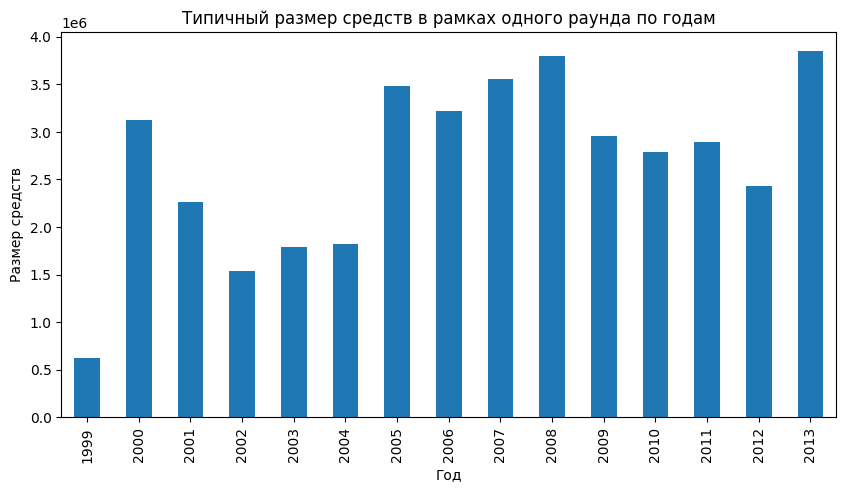

In [19]:
first_que.plot(kind='bar',
               title='Типичный размер средств в рамках одного раунда по годам',
               figsize=(10,5)
)

plt.xlabel('Год')
plt.ylabel('Размер средств')

plt.show()

Чтобы ответить на второй вопрос, выделим из сводной таблицы только 2013 год и построим графики количества раундов и выделяемых в рамках каждого раунда средств:

In [20]:
second_que = pivot_table[pivot_table['year']==2013]

second_que = second_que.groupby('year_month').agg({
    'funding_rounds' : 'sum',
    'round_amount' : 'sum'
}).reset_index()

print(second_que)

   year_month  funding_rounds  round_amount
0     2013-01          2363.0  2.791223e+06
1     2013-02          1700.0  2.826080e+06
2     2013-03          1861.0  3.996805e+06
3     2013-04          2197.0  2.368667e+06
4     2013-05          2134.0  3.357996e+06
5     2013-06          2228.0  5.087180e+06
6     2013-07          2204.0  4.486526e+06
7     2013-08          1937.0  3.714976e+06
8     2013-09          2165.0  4.909891e+06
9     2013-10          2323.0  3.594393e+06
10    2013-11          1943.0  4.783335e+06
11    2013-12           923.0  6.337634e+06


Построим график:

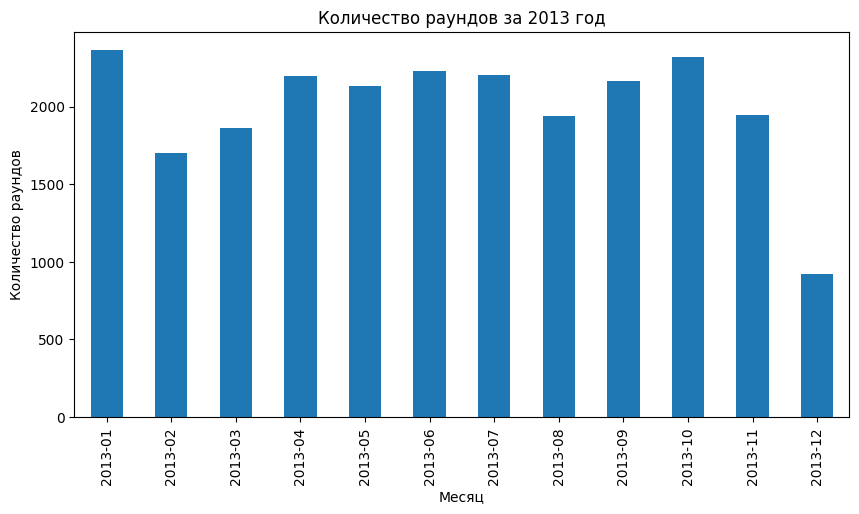

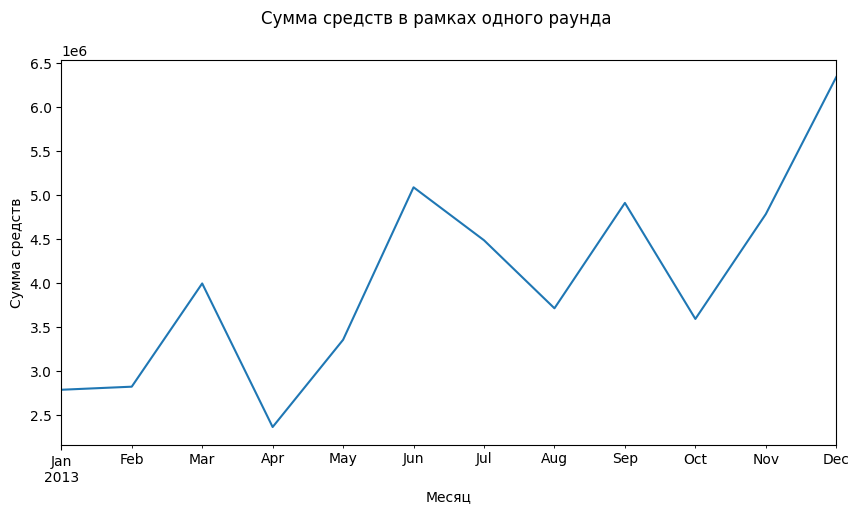

In [21]:
second_que.plot(kind='bar',
                x='year_month',
                y='funding_rounds',
                figsize=(10,5),
                legend=False
)

plt.title('Количество раундов за 2013 год')
plt.xlabel('Месяц')
plt.ylabel('Количество раундов')

plt.show()

second_que.plot(kind='line',
                subplots=True,
                x='year_month',
                y='round_amount',
                figsize=(10,5),
                legend=False,
                sharex=True,
                sharey=False,
                title='Сумма средств в рамках одного раунда')

plt.xlabel('Месяц')
plt.ylabel('Сумма средств')

plt.show()

**Ответы на вопросы:**

1. Максимальный типичный размер средств, выделенный в рамках одного раунда зафиксирован в 2013 году (примерно 3.9 млн).

2. В течении 2013 года количество раундов было стабильно выше 1500, однако, в декабре замечено резкое падение количество раундов. Сумма средств в рамках одного раунда растет в течение года. Резкое увеличение привлеченных средств замечено в марте, июне, сентябре и декабре - каждые три месяца. В декабре отмечена самое большое количество привлеченных средств (6.34 млн).


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Столбцы, по которым нужно произвести соединение, называются по разному. Чтобы объединить датафреймы, используем метод `merge`:

In [22]:
# Произведем объединение датафреймов
merge_group = pd.merge(people, education, left_on='id', right_on='person_id', how='left')

# Выведем полученный датафрейм
display(merge_group)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


Теперь попробуем присоединить таблицу `degrees`. В ней содержится более подробная информация об образовании работников, которая не должна повлиять на дальнейший анализ.

In [23]:
# Присоединим таблицу degrees
merge_group = merge_group.merge(degrees, left_on='id_x', right_on='id', how='left')

# Выведем итоговый датафрейм
display(merge_group)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,10.0,p:6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,100.0,p:938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1000.0,p:13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,10000.0,p:74038,MS,Applied Mathematics
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,100000.0,p:89666,MS,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,99999.0,p:257599,BS,Electrical Engineering
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,NaN,NaN,NaN,NaN
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,NaN,NaN,NaN,NaN
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Введем столбец `not_graduated`, в котором будем отображать есть ли у работника образование:

In [24]:
def not_graduated(x):
    if x >= 0:
        return False
    else:
        return True

merge_group['not_graduated'] = merge_group['id_y'].apply(not_graduated)

In [25]:
display(merge_group)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,not_graduated
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,10.0,p:6265,BS,Economics,False
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,100.0,p:938,BS,Computer Science,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1000.0,p:13098,MBA,NaN,True
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,10000.0,p:74038,MS,Applied Mathematics,True
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,100000.0,p:89666,MS,Computer Science,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,99999.0,p:257599,BS,Electrical Engineering,True
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,NaN,NaN,NaN,NaN,False
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,NaN,NaN,NaN,NaN,False
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,True


Теперь произведем группировку по компаниям и посчитаем общее количество сотрудников и количество сотрудников без информации об образовании:

In [26]:
# Произведем группировку по company_id 

grouped = merge_group.groupby('company_id').agg({
    'id_x' : 'count', # Посчитаем всех сотрудников в компании по id_x
    'not_graduated' : 'sum' # Найдем количество сотрудников без образования not_graduated
}).reset_index()

# Найдем долю сотрудников без образования от общего количества
grouped['not_graduated_percent'] = (grouped['not_graduated'] / grouped['id_x'] * 100).round(2)

display(grouped)

,company_id,id_x,not_graduated,not_graduated_percent
0,1.0,3,1,33.33
1,2.0,1,0,0.00
2,3.0,5,1,20.00
3,4.0,18,1,5.56
4,5.0,84,16,19.05
...,...,...,...,...
22917,285897.0,2,0,0.00
22918,285953.0,1,1,100.00
22919,285972.0,2,1,50.00
22920,285996.0,1,0,0.00


Чтобы выделить группы компаний по количеству сотрудников выведем описательную статистику методом `describe`:

In [27]:
print(grouped['id_x'].describe())

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: id_x, dtype: float64


Теперь попорбуем визуализировать разброс категорий:

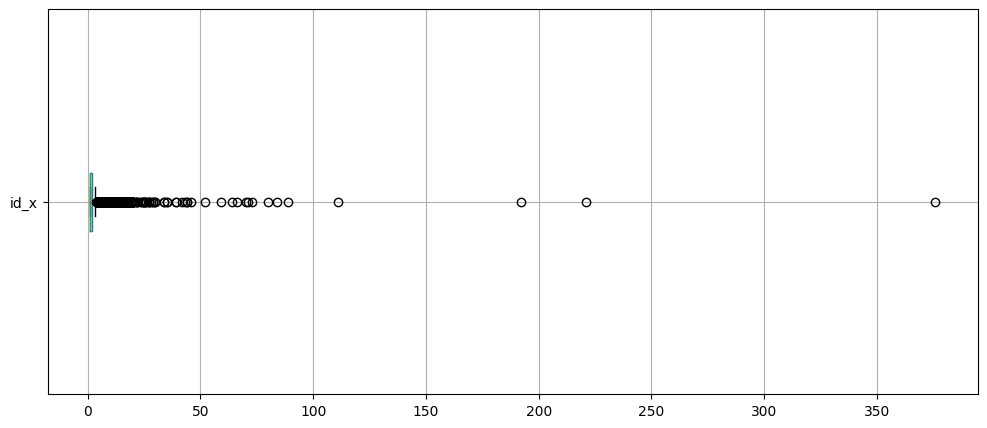

In [28]:
grouped.boxplot(column='id_x',
               vert=False,
               figsize=(12,5))

plt.show()

Согласно данным описательной статистики больше половины данных в исходных датафреймах содержат информацию только об одном или двух сотрудниках. Опираясь на разброс, попробуем выделить такие категории:
- от 1 до 2 сотрудников
- от 3 до 50 сотрудников
- от 50 до 100 сотрудников
- от 100 сотрудников

Чтобы разделить выборку на группы, напишем функцию `category`:

In [29]:
# Функция category присваивает категорию
# в зависимости от количества сотрудников
def category(x):
    if 1 <= x <= 2:
        return 'от 1 до 2 сотрудников'
    elif 2 < x <= 50:
        return 'от 3 до 50 сотрудников'
    elif 50 <= x < 99:
        return 'от 50 до 100 сотрудников'
    elif 100 <= x:
        return 'от 100 сотрудников'
    
# Применим функцию для создания столбца category
grouped['category'] = grouped['id_x'].apply(category)

# Проверим как сработала функция
display(grouped)

,company_id,id_x,not_graduated,not_graduated_percent,category
0,1.0,3,1,33.33,от 3 до 50 сотрудников
1,2.0,1,0,0.00,от 1 до 2 сотрудников
2,3.0,5,1,20.00,от 3 до 50 сотрудников
3,4.0,18,1,5.56,от 3 до 50 сотрудников
4,5.0,84,16,19.05,от 50 до 100 сотрудников
...,...,...,...,...,...
22917,285897.0,2,0,0.00,от 1 до 2 сотрудников
22918,285953.0,1,1,100.00,от 1 до 2 сотрудников
22919,285972.0,2,1,50.00,от 1 до 2 сотрудников
22920,285996.0,1,0,0.00,от 1 до 2 сотрудников


Теперь сгруппируем данные по полученным категориям и посчитаем среднюю долю работников, не имеющих информации об образовании: 

In [30]:
# Группируем данные по category и находим среднее по not_graduated_percent
grouped_category = grouped.groupby('category')['not_graduated_percent'].mean().reset_index().sort_values(by='not_graduated_percent')

# Выводим полученную выборку
display(grouped_category)

,category,not_graduated_percent
1,от 100 сотрудников,17.547500
3,от 50 до 100 сотрудников,18.298000
2,от 3 до 50 сотрудников,26.062806
0,от 1 до 2 сотрудников,50.060895


Теперь построим график распределения доли сотрудников, по которым нет информации об их образовании:

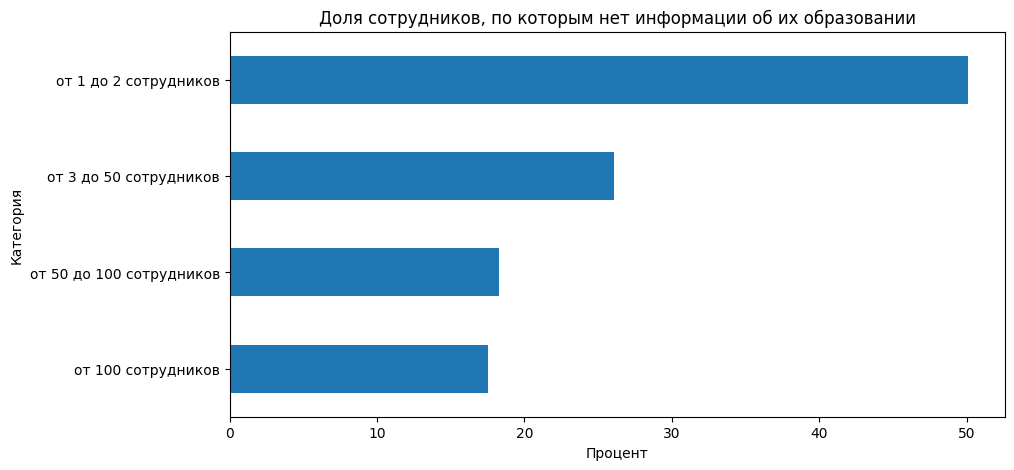

In [31]:
grouped_category.sort_values(by='not_graduated_percent').plot(kind='barh',
                                                              x='category',
                                                              figsize=(10,5),
                                                              legend=False)

plt.title('Доля сотрудников, по которым нет информации об их образовании')
plt.xlabel('Процент')
plt.ylabel('Категория')

plt.show()

Из графика видно, что самый большой средний процент (59.2%) отсуствия образования у сотрудников есть в компаниях, где информация представлена всего об одном человеке. Самый низкий процент (17.5%) отмечен в самых больших кампаниях.

**Вывод:** 
- Можно установить зависимость - чем больше компания, тем меньше в ней доля сотрудников без информации об образовании. 
- Датафрейм `degrees` можно подключить для решения данной задачи, но особой необходимости в этом нет.

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в двух датасетах: `company_and_rounds` и `people`. Чтобы понять, подходит ли этот столбец, посчитаем  уникальных значений в датасетах и сравним результаты.

In [32]:
car_username_count = company_and_rounds['network_username'].nunique()
print(f'Кол-во уникальных значений в company_and_rounds - {car_username_count}')

p_username_count = people['network_username'].nunique()
print(f'Кол-во уникальных значений в people - {p_username_count}')

duplicate_percent = p_username_count / car_username_count * 100
print(f'Доля повторяющихся значений {round(duplicate_percent,2)} %')

Кол-во уникальных значений в company_and_rounds - 79571
Кол-во уникальных значений в people - 38421
Доля повторяющихся значений 48.29 %


**Вывод:**
Доля повторяющихся значений почти 50% - это весомая часть. 

Если стоит цель подключить к `people` таблицу `company_and_rounds`, то для объединения можно использовать столбец `network_username` с указанием параметра 'left', т.к данных в таблице `company_and_rounds` больше, чем в `people`. 


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Попробуем разделить датафрейм `company_and_rounds` на два датасета. В одном будет содержаться вся информация о компаниях, а во втором информация о компаниях и их этапах финансирования:

In [33]:
# Настроим отображение всех колонок
pd.set_option('display.max_columns', None)

# Датафрейм, содержащий всю информацию о компаниях
df_company = company_and_rounds[['company_id', 'name', 'category_code', 'status', 
                                 'founded_at', 'closed_at',
                                 'domain', 'network_username', 
                                 'country_code', 'investment_rounds',
                                 'funding_rounds', 'funding_total', 'milestones']].copy()

# Датафрейм, содержаший информацию о раундах финансирования
df_rounds = company_and_rounds[['funding_round_id', 'company_id', 'funded_at', 
                                'funding_round_type', 'raised_amount', 'pre_money_valuation', 
                                'participants', 'is_first_round', 'is_last_round']].copy()

# Удалим возможные явные дубликаты
df_company.drop_duplicates(inplace=True)
df_rounds.drop_duplicates(inplace=True)

# Удалим строки, в которых нет информации о компаниях
df_company.dropna(subset=['company_id', 'name'], inplace=True)
df_rounds.dropna(subset=['funding_round_id','company_id'], inplace=True)

# Сбросим порядок индексов
df_company = df_company.reset_index(drop=True)
df_rounds = df_rounds.reset_index(drop=True)

Посмортим как теперь выглядят отдельные датафреймы:

In [34]:
display(df_company)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196547,183352.0,Mattress Source,NaN,operating,NaT,NaT,mattresssourcestl.com,network,NaN,0.0,0.0,0.0,0.0
196548,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196549,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
196550,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0


In [35]:
display(df_rounds)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
4,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
52621,20896.0,3429.0,2011-01-10,venture,7000000.0,0.0,1.0,1.0,0.0
52622,2836.0,7748.0,2008-01-31,angel,1300000.0,0.0,8.0,1.0,1.0
52623,12687.0,43233.0,2010-03-05,angel,500000.0,0.0,2.0,0.0,1.0
52624,21259.0,43233.0,2011-02-02,series-a,7000000.0,0.0,5.0,0.0,0.0


Стало намного нагляднее. После удаления всех явных дубликатов из обоих датасетов можно посмотреть на количество пустых ячеек:


In [36]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196552 entries, 0 to 196551
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196552 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196552 non-null  object        
 4   founded_at         91226 non-null   datetime64[ns]
 5   closed_at          2619 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196552 non-null  float64       
 10  funding_rounds     196552 non-null  float64       
 11  funding_total      196552 non-null  float64       
 12  milestones         196552 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Пропуски замечены в столбцах, которая не сильно важна для заказчика.

In [37]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52626 entries, 0 to 52625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52626 non-null  float64       
 1   company_id           52626 non-null  float64       
 2   funded_at            52382 non-null  datetime64[ns]
 3   funding_round_type   52626 non-null  object        
 4   raised_amount        52626 non-null  float64       
 5   pre_money_valuation  52626 non-null  float64       
 6   participants         52626 non-null  float64       
 7   is_first_round       52626 non-null  float64       
 8   is_last_round        52626 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.6+ MB


В этом датафрейме полностью отсутсвуют пропуски.

**Вывод:**
Заказчику было важно сохранить данные о размерах средств. Видно, что пропуски в нужных столбцах отсутсвуют, а значит теория о том, что изначальный датафрейм состоял из двух датасетов подтвердилась. 

В дальнейшем можно выводить интересующую информацию о конкретной компании и проводить исследовательский анализ зная только её `company_id`.


## Шаг 3. Исследовательский анализ объединённых таблиц


### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

Выберем компании из датасета в соотвествии с условиями фильтрации:

In [38]:
# Создаем копию датасета 
df_acquired = df_company.copy()

# Произведем фильрацию по стобцам
df_acquired = df_acquired[(df_company['funding_rounds'] > 0) |
                          (df_company['investment_rounds'] > 0) |
                          (df_company['status'] == 'acquired')
]

# Выведем полученный датафрейм
display(df_acquired)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
196544,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
196548,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196549,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


Мы получили отфильтрованный датафрейм.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Чтобы оценить разброс размеров средств финансирования компаний построим гистрограмму распределения значений столбца `funding total`. На ней мы увидим какие числовые значение чаще всего встречаются:

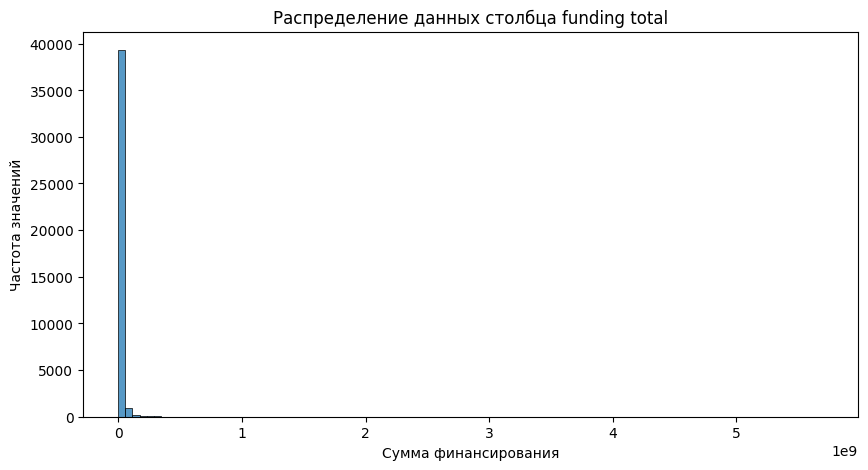

In [39]:
# Задаем размеры графика
plt.figure(figsize=(10,5))

# Строим диаграмму
sns.histplot(data=df_acquired,
             x='funding_total',
             bins=100)

# Задаем название графика и его осей
plt.title('Распределение данных столбца funding total')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота значений')

# Отображаем график
plt.show()

На диаграмме видно, что чаще всего в датасете встречаются компании с нулевой суммой финансирования. Построим диаграмму размаха, чтобы отобразить другие малозаметные значенния столбца:

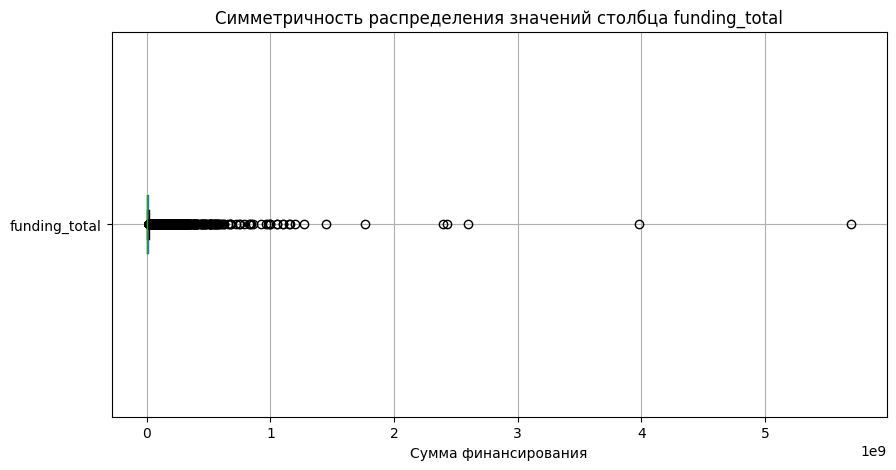

In [40]:
# Строим диаграмму
df_acquired.boxplot(column='funding_total',
                    vert=False,
                    figsize=(10,5))

# Задаем название графика и его осей
plt.title('Симметричность распределения значений столбца funding_total')
plt.xlabel('Сумма финансирования')

# Отображаем график
plt.show()

В датафрейме присутсвует множество разных сумм финансирования, однако их количество крайне мало, из-за чего их не было видно на первом графике. Выведем статистические показатели столбца `funding total` для детального анализа:

In [41]:
# Расчитаем статистические показатели столбца
describe = df_acquired['funding_total'].describe()
print(f'Статистические показатели столбца describe \n{describe}')

Статистические показатели столбца describe 
count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64


**Промежуточные выводы:**
- Минимальное значение 0, максимальное 5.7 млрд.
- Среднее значение - 10.14 млн, стандартное отклонение - 56 млн. Это говорит о том, что значения в столбце сильно варьируются от среднего.
- В данных присутсвуют выпросы - доля нулевых значений в столбце 25%.

В столбце `funding total` присутсвует большое количество нулевых значений, а максимальное значение сильно больше среднего. Следует учитывать это при нахождении типичных значений.


### Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

Чтобы ответить на вопрос нам потребуется датасет `acquisition` с информацией о проданных компаниях и суммах сделки. Присоединим его с помощью `merge`. При присоединении выберем только необходимые столбцы для анализа:

In [42]:
# Создаем копию датафрейма
df_free = df_acquired.copy()

# Присоединим информацию о купленных компаниях
df_free = df_free.merge(acquisition[['acquired_company_id', 'price_amount']], 
                        left_on='company_id',
                        right_on='acquired_company_id',
                        how='left')

# Отфильтруем датафрейм
df_free = df_free[
    ((df_free['price_amount'] == 0) | (df_free['price_amount'] == 1)) &
    (df_free['funding_total'] > 0)
    
]

# Выведем полученный результат
display(df_free)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,10054.0,0.0
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,101312.0,0.0
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,101340.0,0.0
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,10137.0,0.0
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,10139.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,99.0,0.0
40836,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,9905.0,0.0
40840,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,992.0,0.0
40854,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,997.0,0.0


Датафрейм присоединился корректно, теперь выведем информацию методом `describe()`:

In [43]:
df_free['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Мы избавились от нулевых выбросов, 25-й процентиль теперь имеет данные о финансировании. Однако, стандартное отклонение все еще на порядок выше, чем среднее - скорее всего в столбце еще остались выбросы. Построим диаграмму размаха, чтобы оценить выбросы:

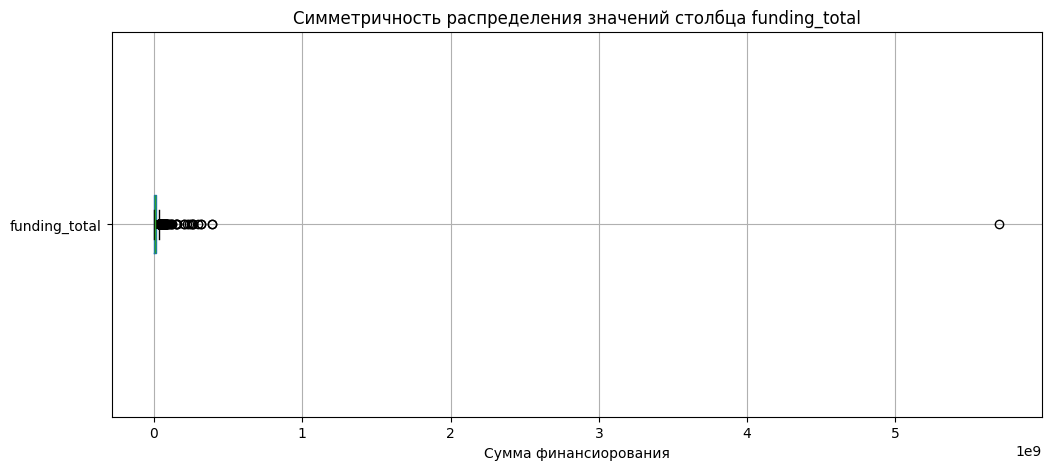

In [44]:
df_free.boxplot(column='funding_total',
                vert=False,
                figsize=(12,5))

plt.title('Симметричность распределения значений столбца funding_total')
plt.xlabel('Сумма финансиорования')


plt.show()

Диаграмма сохраняет вид правоассиметричного распределения из-за выброса в 5.7 млрд долларов. Попробуем избавиться от него с помощью фильтрации значений столбца `funding total` по 99-му процентилю:

In [45]:
# Найдем 99-й процентиль 
quantile99 = df_free['funding_total'].quantile(0.99)

# Выведем результат
print(f'99-й процентиль: {round(quantile99,2)}')

99-й процентиль: 151552930.0


Установим верхнюю границу значений по 99-му процентилю и выведем размах данных с помощью `describe()`:

In [46]:
# Отбираем данные по 99-му процентилю 
df_free = df_free.loc[df_free['funding_total'] < quantile99]

# Выводим статистику столбца
df_free['funding_total'].describe()

count    1.601000e+03
mean     1.223055e+07
std      1.652237e+07
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.505000e+07
max      1.500000e+08
Name: funding_total, dtype: float64

Теперь среднее заметно значение к стандартному отклонению и данные выглядят намного симметричнее. Построим диаграмму размаха, чтобы оценить новое распределение данных:

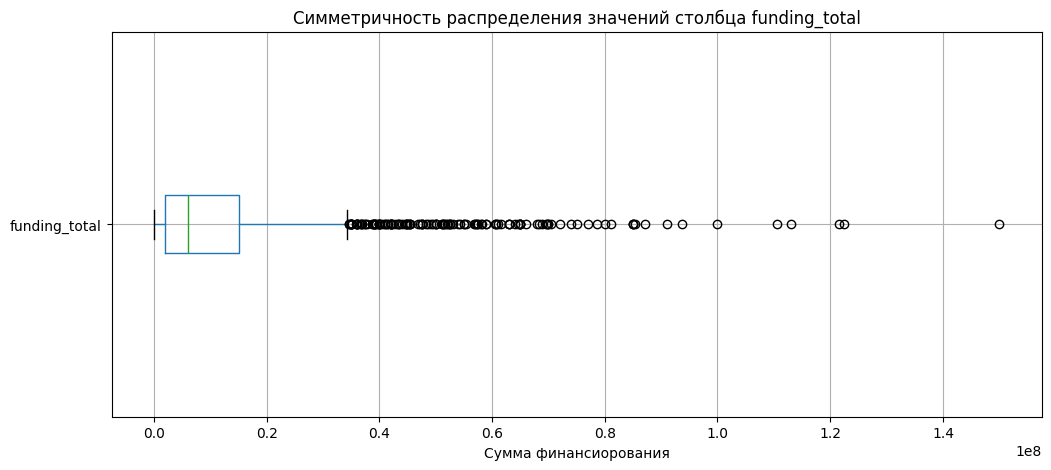

In [47]:
df_free.boxplot(column='funding_total',
                vert=False,
                figsize=(12,5))

plt.title('Симметричность распределения значений столбца funding_total')
plt.xlabel('Сумма финансиорования')


plt.show()

Данные столбца `funding_total` выглядят корректными. Можно устновить новые верхние и нижние границы:

In [48]:
# Установим нижнюю и верхнюю границы
low_border = df_free['funding_total'].quantile(0.25)
up_border = df_free['funding_total'].quantile(0.75)

# Выведем полученные границы
print(f'25-ый процентиль - {low_border / 1e6} млн $')
print(f'75-ый процентиль - {up_border / 1e6} млн $')

25-ый процентиль - 2.0 млн $
75-ый процентиль - 15.05 млн $


**Промежуточный вывод:**

Подключение датасета `acquisition` помогло в рассчете верхней и нижней границы суммы финансирования. 

Установление новых границ возможно, если принять во внимание допущение, что сумма финансирования в 5.7 млрд долларов действительно является выбросом. Так, рассчитанные по проценталям граничные значения для столбца `funding total` выглядят уместно:

 - нижняя граница: 2 млн долларов.
 - верхняя граница: 15.05 млн долларов.


### Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Будем выделять топ категорий на основе изначального датафрейма `df_acquired`. Т.к в нем присутсвуют выбросы в столбце `funding total` отфильтруем его по новым границам, найденным в предыдущем задании:

In [49]:
# Копируем датафрейм
df_border = df_acquired.copy()

# Задаем новые граничные значения
df_border = df_border[
    (df_border['funding_total'] >= 2 * 1e6) & 
    (df_border['funding_total'] <= 15.05 * 1e6)
]

Чтобы определить топ категорий, которые будут соотвествовать сразу двум условиям, рассчитаем медианные значения и стандартные отклонения по столбцу `funding_total` для каждой категории поотдельности, а потом соединим полученные результаты и выведем общий топ:

In [50]:
# Сгруппируем данные по категориям 
# и рассчитаем медиану и стандартное отклонение
grouped_price = df_border.groupby('category_code')['funding_total'].agg(['median', 'std'])

# Распределим сгруппированные данные по медианному значению 
# и стандартному отклонению
sort_median = grouped_price['median'].sort_values(ascending=False)
sort_std = grouped_price['std'].sort_values(ascending=False)

# Объеденим две выборки по категории и самым большим 
# медианному значению и стандартному отклонению
top = pd.merge(sort_median, sort_std, on='category_code')

# Выведем топ категорий 
print(top)

                     median           std
category_code                            
semiconductor     8000000.0  3.923002e+06
public_relations  6370000.0  3.849770e+06
automotive        6050000.0  3.905275e+06
security          6049170.0  3.916951e+06
finance           6000000.0  3.787676e+06
network_hosting   6000000.0  3.785947e+06
cleantech         6000000.0  3.857546e+06
transportation    5908655.0  3.450091e+06
hardware          5810155.0  3.533689e+06
advertising       5800000.0  3.688715e+06
enterprise        5700000.0  3.892282e+06
biotech           5656945.0  3.656463e+06
medical           5550000.0  3.716677e+06
software          5500000.0  3.683905e+06
legal             5160800.0  3.327400e+06
analytics         5117500.0  3.471020e+06
nanotech          5115960.0  4.095801e+06
mobile            5114765.0  3.585808e+06
real_estate       5010000.0  3.784055e+06
games_video       5000000.0  3.708359e+06
ecommerce         5000000.0  3.562980e+06
consulting        5000000.0  3.554

Получилось 42 категории, выведем топ-5 категорий, т.к первые 5 значений максимально вариативны по медианному значению:

In [51]:
print(top.head())

                     median           std
category_code                            
semiconductor     8000000.0  3.923002e+06
public_relations  6370000.0  3.849770e+06
automotive        6050000.0  3.905275e+06
security          6049170.0  3.916951e+06
finance           6000000.0  3.787676e+06


**Промежуточный вывод:**
Самой выгодной категорией, с точки зрения большой стоимости и большим разбросом цен является `semiconductor`.


### Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Выведем статистические показатели столбца `funding_rounds`:

In [52]:
print(df_border['funding_rounds'].describe())

count    9847.000000
mean        1.700924
std         1.018128
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: funding_rounds, dtype: float64


- В большинстве случаев у каждого статуса стартапа всего 1 раунд. 
- Минимальное значение - 1 раунд, максимальное значение - 13 раундов.
- Среднее количество раундов - 1.7

Теперь выведем типичное значение количества раундов для каждого возможного статуса стартапа:

In [53]:
# Копируем датафрейм
status_round = df_border.copy()

# Выберем только те компании, у котороых было больше 0 раундов
status_round = status_round[status_round['funding_rounds'] > 0]

# Группируем данные
status_round = df_border.groupby('status')['funding_rounds'].median().sort_values(ascending=False).round(2)

# Выводим результат
print(status_round)

status
acquired     1.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64


Типичное значение для кадого статуса стартапа - 1 раунд.

Построим график распределения среднего количества раундов для каждого статуса стартапа:

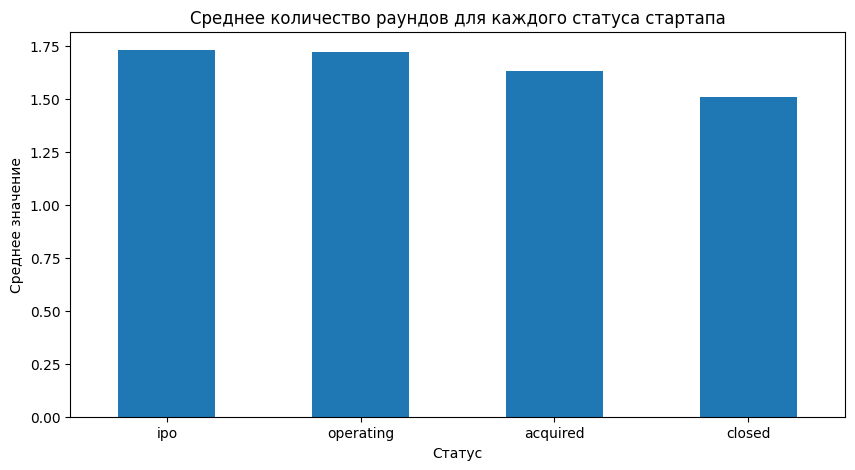

In [54]:
status_round_graph = df_border.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).round(2)

plt.figure(figsize=(10,5))

status_round_graph.plot(kind='bar',
                        rot=0)

plt.title('Среднее количество раундов для каждого статуса стартапа')
plt.xlabel('Статус')
plt.ylabel('Среднее значение')

plt.show()

**Промежуточный вывод:**
На графике видно, что чем ближе компания к закрытию, тем меньше среднее значение количества раундов для компании. 


## Шаг 4. Итоговый вывод и рекомендации

Максимальный размер средств, привлеченных в рамках одного раунда, зафиксирован в 2013 году. Несмотря на это, было замечено резкое падение количества раундов в декабре, что может указывать на изменение рыночной ситуации или уменьшение интереса инвесторов к новым проектам.

Периодические всплески финансирования в марте, июне, сентябре и декабре могут сигнализировать о сезонных факторах, оказывающих влияние на решения инвесторов. Особенно стоит обратить внимание на декабрь, когда зафиксировано максимальное количество привлеченных средств.

- При рассмотрении компании к покупке следует обращать внимание на сезонность.
   
В небольших компаниях наблюдается большая доля сотрудников без информации об образовании. Это может указывать на меньшую структурированность и формализованность в таких компаниях. Подтверждением этой зависимости является тот факт, что в крупных компаниях более тщательно следят за образованием сотрудников.

При выполнение проекта был проведен анализ всех данных, в частности, столбца `funding total` датафрейма `company_and_rounds`. Было обнаружено, что данные характеризуются значительными колебаниями: минимальное значение составляет 0, максимальное — 5.7 млрд долларов, что говорит о наличии больших выбросов. Среднее значение финансирования составляет 10.14 млн долларов с стандартным отклонением 56 млн долларов, что подтверждает высокую степень вариативности в данных.

- Большая доля пропусков сигнализирует о некачественных исходных данных. Анализ на их основе может быть некорректен для принятия успешных стратегических решений.

Необходимо отметить, что 25% значений в столбце `funding total` являются нулевыми, что также указывает на проблемы с полнотой данных. Была рассмотрена возможность применения датасета `acquisition`, который помог определить более точные границы для оценки суммы финансирования. При принятии в расчет допущения, связанного с выбросом в размере 5.7 млрд долларов, были установлены новые граничные значения: нижняя граница составляет 2 млн долларов, а верхняя — 15.05 млн долларов

- Установленные новые границы финансирования (нижняя граница 2 млн, верхняя граница 15.05 млн) позволяют лучше классифицировать и анализировать данные по раундам. Следует учитывать возможные выбросы при проведении дальнейших анализов.

Так же анализ различных категорий показал, что наиболее выгодной с точки зрения стоимости и разброса является категория `semiconductor`.

На графике было продемонстрировано, что успешность компаний, приближающихся к закрытию, сопровождается уменьшением среднего количества раундов финансирования.